In [1]:
%matplotlib notebook

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Reading the Merged_data file 
df = pd.read_csv('./data/Merged_data.csv')
df.head()

,IHP Amount for Owners,Owners Approved,Owners <$10k,Owners $10-25k,Owners $25k - Max,Owners Max,IHP Amount for Renters,Renters Approved,Renters $25k - Max,Renters Max,incidentType,fyDeclared
0,32272,8.0,6.0,2.0,0.0,0.0,0,0.0,0.0,0.0,Flood,2013.0
1,622024,260.0,251.0,9.0,0.0,0.0,29177,19.0,0.0,0.0,Flood,2013.0
2,31821,14.0,14.0,0.0,0.0,0.0,7079,4.0,0.0,0.0,Flood,2013.0
3,44331,11.0,9.0,2.0,0.0,0.0,0,0.0,0.0,0.0,Flood,2013.0
4,90293298,36895.0,35846.0,966.0,83.0,29.0,37099655,12965.0,35.0,1.0,Flood,2013.0


In [4]:
#Dropping the duplicates and checking the incident types
incident_type = df['incidentType'].drop_duplicates()
print(incident_type)

0                Flood
35             Tornado
73       Mud/Landslide
75     Severe Storm(s)
105         Earthquake
223            Typhoon
233               Fire
467          Hurricane
710                  0
893            Volcano
Name: incidentType, dtype: object


In [5]:
#Dropping the duplicates from years and checking the years entries
years = df['fyDeclared'].drop_duplicates()
print(years)

0       2013.0
59      2014.0
110     2015.0
235     2016.0
478     2017.0
710        0.0
848     2018.0
944     2019.0
1119    2020.0
Name: fyDeclared, dtype: float64


In [6]:
#grouping the data by incident type and years count and creating a dataframe
df.groupby(['incidentType','fyDeclared']).count().reset_index()

,incidentType,fyDeclared,IHP Amount for Owners,Owners Approved,Owners <$10k,Owners $10-25k,Owners $25k - Max,Owners Max,IHP Amount for Renters,Renters Approved,Renters $25k - Max,Renters Max
0,0,0.0,3,3,3,3,3,3,3,3,3,3
1,Earthquake,2014.0,2,2,2,2,2,2,2,2,2,2
2,Earthquake,2019.0,3,3,3,3,3,3,3,3,3,3
3,Fire,2015.0,2,2,2,2,2,2,2,2,2,2
4,Fire,2017.0,1,1,1,1,1,1,1,1,1,1
5,Fire,2018.0,14,14,14,14,14,14,14,14,14,14
6,Fire,2019.0,3,3,3,3,3,3,3,3,3,3
7,Flood,2013.0,50,50,50,50,50,50,50,50,50,50
8,Flood,2014.0,3,3,3,3,3,3,3,3,3,3
9,Flood,2015.0,12,12,12,12,12,12,12,12,12,12


In [7]:
#Creating a sub dataframe to query and create new dataframe for incidents happening in only 2017
dfa = df.groupby(['incidentType','fyDeclared']).count().reset_index().query("fyDeclared == 2017")

In [8]:
#checking the dataframe head
dfa.head()

,incidentType,fyDeclared,IHP Amount for Owners,Owners Approved,Owners <$10k,Owners $10-25k,Owners $25k - Max,Owners Max,IHP Amount for Renters,Renters Approved,Renters $25k - Max,Renters Max
4,Fire,2017.0,1,1,1,1,1,1,1,1,1,1
11,Flood,2017.0,42,42,42,42,42,42,42,42,42,42
16,Hurricane,2017.0,287,287,287,287,287,287,287,287,287,287
23,Severe Storm(s),2017.0,25,25,25,25,25,25,25,25,25,25
28,Tornado,2017.0,14,14,14,14,14,14,14,14,14,14


In [10]:
#creating a pie chart of incidents in year 2017 and sorting it by 
# what percentage of incidents that were approved for the owners.
incident_type = dfa['incidentType']
years = dfa['Owners Approved']
colors = ["yellow", "green", "lightblue", "orange", "red"]
explode = (0.1, 0, 0, 0, 0.5)

<IPython.core.display.Javascript object>


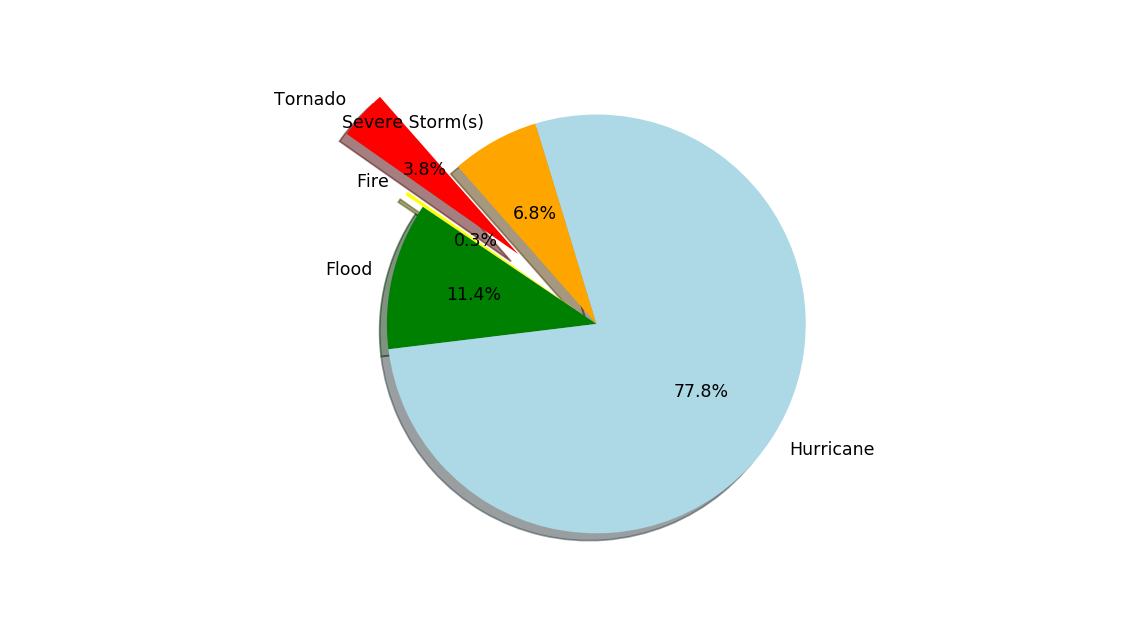

In [11]:
# Tell matplotlib to create a pie chart based upon the above data
fig = plt.figure(figsize = (9,5))
ax1 = fig.add_subplot(111)
ax1.pie(years,explode = explode, labels= incident_type, colors = colors,
        autopct="%1.1f%%", shadow=True, startangle=145)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")

# Save an image of our chart and print the final product to the screen
plt.savefig("Merged_Data_pie_2017.png")
plt.show()

In [12]:
#created another dataframe where the records are counted by incident type for all years
dfb = df.groupby(['incidentType']).count().reset_index()

In [13]:
#If we check above, we have an incident type "0", in this instance we are taking all the records that do not have that incident type.
#Any records with incident "0" are excluded
dfb = dfb[~dfb["incidentType"].str.contains("0")]

In [14]:
#checking the dataframe
dfb

,incidentType,IHP Amount for Owners,Owners Approved,Owners <$10k,Owners $10-25k,Owners $25k - Max,Owners Max,IHP Amount for Renters,Renters Approved,Renters $25k - Max,Renters Max,fyDeclared
1,Earthquake,5,5,5,5,5,5,5,5,5,5,5
2,Fire,20,20,20,20,20,20,20,20,20,20,20
3,Flood,406,406,406,406,406,406,406,406,406,406,406
4,Hurricane,377,377,377,377,377,377,377,377,377,377,377
5,Mud/Landslide,2,2,2,2,2,2,2,2,2,2,2
6,Severe Storm(s),258,258,258,258,258,258,258,258,258,258,258
7,Tornado,49,49,49,49,49,49,49,49,49,49,49
8,Typhoon,7,7,7,7,7,7,7,7,7,7,7
9,Volcano,1,1,1,1,1,1,1,1,1,1,1


In [15]:
#creating a pie chart of incidents in all years nd sorting it by 
# what percentage of incidents that were approved for the owners
# we can change the selection to 'Renters Approved' to see percentage by renters
incident_type = dfb['incidentType']
years = dfb['Owners Approved']
colors = ["yellow", "green", "lightblue", "orange", "red",
          "purple", "pink", "yellowgreen", "lightskyblue","lightcoral"]
explode = (0.1, 0, 0, 0, 0.1, 0, 0, 0, 0)

<IPython.core.display.Javascript object>


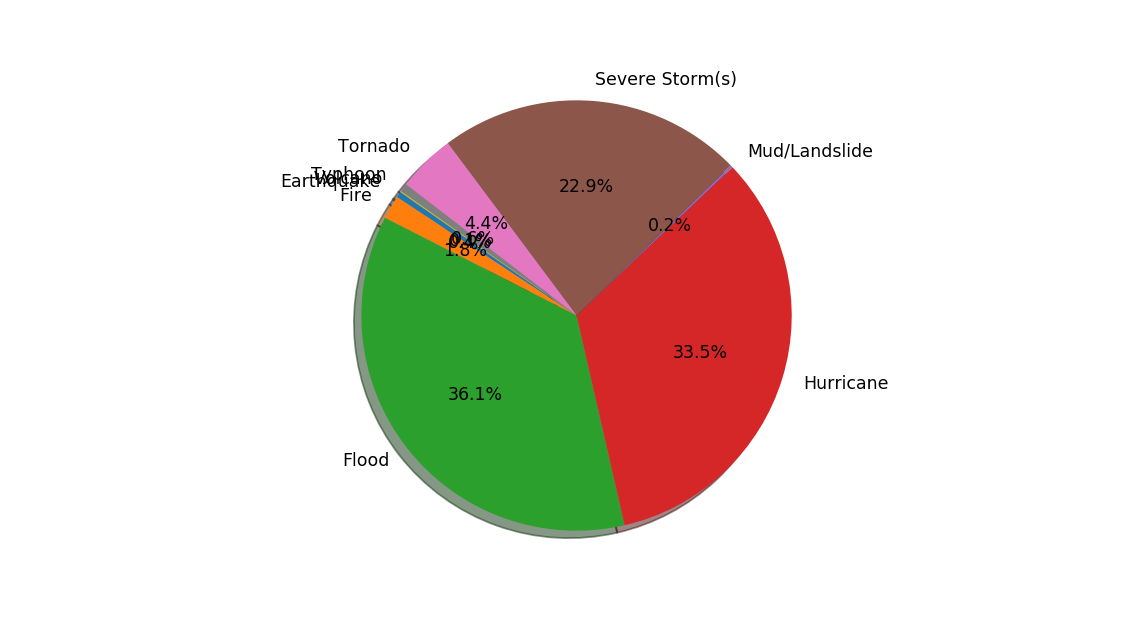

In [21]:
# # Tell matplotlib to create a pie chart based upon the above data
fig = plt.figure(figsize = (9,5))
ax2 = fig.add_subplot(111)
ax2.pie(years, labels= incident_type, 
        autopct="%1.1f%%", shadow=True, startangle=145)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")

# Save an image of our chart and print the final product to the screen
plt.savefig("Merged_data_by_Owners_approved_pie.png")
plt.show()